In [1]:
import torch
from torchsummary import summary
from modules.data_preprocessing import get_data
from modules.figure_generation import train_imshow, test_imshow, train_test_loss_function, train_test_accuracy, model_classification_report, confusion_matrix_results
from modules.model_training import training_the_model, model, criterion
from modules.model_results import model_predictions
from tests.model_testing import annotated_predictions

USING GPU


In [2]:
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [3]:
# import the preprocessed train and test datasets
train, test = get_data()

In [4]:
# Classes of traffic road signs being analyzed
classes = ('bump','construction','divided-highway-begins',
           'divider-ahead','handicap',
           'no-parking-either-sides',
           'pedestrian-crossing','people-working',
           'railway-crossing','shared-use',
           'speed-limit-80','stop','yield')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([7, 3, 160, 160])
torch.Size([7])


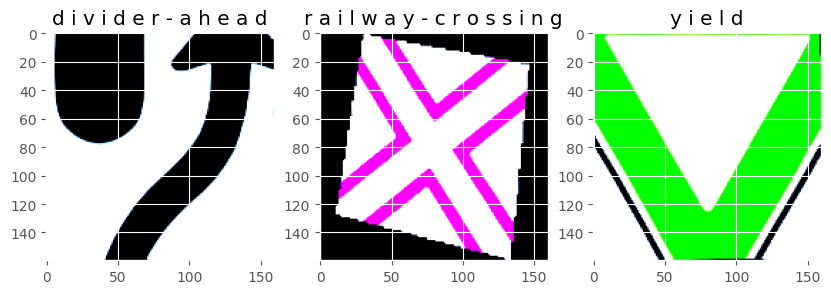

<Figure size 640x480 with 0 Axes>

In [5]:
# Visualizing sample training dataset images after preprocessing
train_imshow(train, classes, batch_size=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([7, 3, 160, 160])
torch.Size([7])


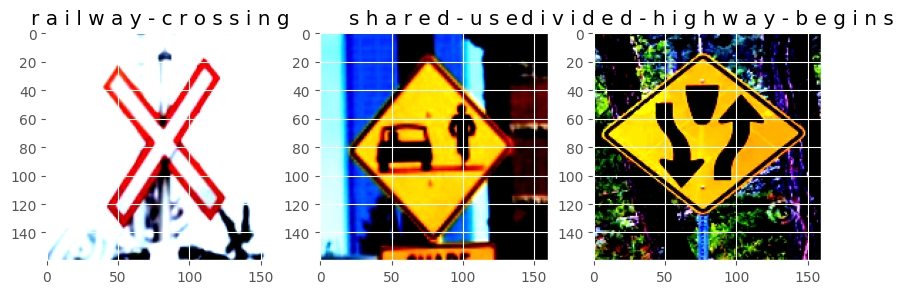

<Figure size 640x480 with 0 Axes>

In [6]:
# Visualizing sample test dataset images after preprocessing
test_imshow(test, classes, batch_size=3)

In [7]:
# Train model or load previously trained model
train_new_model = True
model_state_dict_filename = '/home/sammie/Capstone Project/image-classification-of-road-signs/output/model_temp.pth'

n_epochs=500

if train_new_model:
    # Choose number of epochs for iteration and the value of the learning rate for training the model.
    epoch_loss_train, epoch_acc_train, epoch_loss_test, epoch_acc_test = training_the_model(n_epoch=n_epochs, train=train, test=test)
else:
    # Load already trained model from directory
    model.load_state_dict(torch.load(model_state_dict_filename))

epoch: 0000 | training loss = 2.5662 | training accuracy = 7.7 | test loss = 2.5643 | test accuracy = 17.9 | learning rate = 0.0005
epoch: 0001 | training loss = 2.5610 | training accuracy = 23.1 | test loss = 2.5633 | test accuracy = 24.4 | learning rate = 0.0005
epoch: 0002 | training loss = 2.5580 | training accuracy = 46.2 | test loss = 2.5601 | test accuracy = 25.6 | learning rate = 0.0005
epoch: 0003 | training loss = 2.5559 | training accuracy = 53.8 | test loss = 2.5554 | test accuracy = 34.6 | learning rate = 0.0005
epoch: 0004 | training loss = 2.5406 | training accuracy = 61.5 | test loss = 2.5452 | test accuracy = 38.5 | learning rate = 0.0005
epoch: 0005 | training loss = 2.5230 | training accuracy = 53.8 | test loss = 2.5266 | test accuracy = 37.2 | learning rate = 0.0005
epoch: 0006 | training loss = 2.4618 | training accuracy = 61.5 | test loss = 2.4855 | test accuracy = 38.5 | learning rate = 0.0005
epoch: 0007 | training loss = 2.3580 | training accuracy = 76.9 | test

In [8]:
# Visualizing the depth and structure of the model

print(model)
summary(model.cuda(),(3, 160, 160))

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

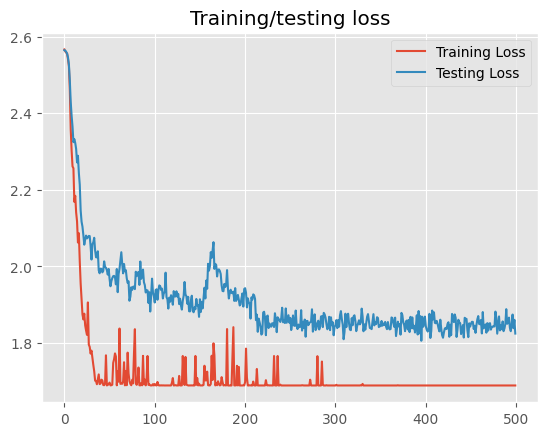

<Figure size 640x480 with 0 Axes>

In [9]:
# Training/testing loss function plot. This function only works for training new model.

train_test_loss_function(n_epoch=n_epochs, epoch_loss_train=epoch_loss_train, epoch_loss_test=epoch_loss_test)

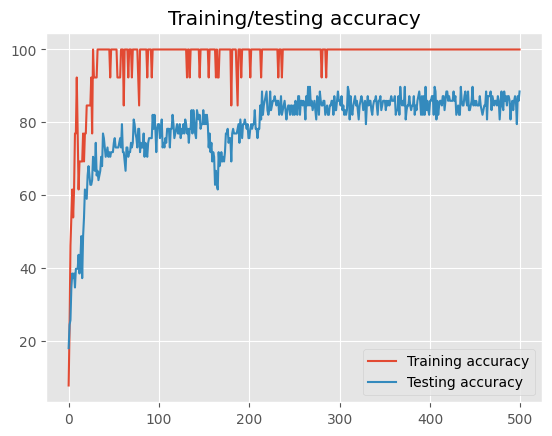

<Figure size 640x480 with 0 Axes>

In [10]:
# Accuracy plot of model training. This function only works for training new model.

train_test_accuracy(n_epoch= n_epochs, epoch_acc_train=epoch_acc_train, epoch_acc_test=epoch_acc_test)

In [21]:
# Viewing the model results. This function only works for training new model.

correct_predictions, total, test_accuracy, test_loss, y, y_pred = model_predictions(test=test, model=model, criterion=criterion)
print(f'The total number of correct predictions by the model is: {correct_predictions}')
print(f'The total number of images is: {total}')

The total number of correct predictions by the model is: 67
The total number of images is: 78


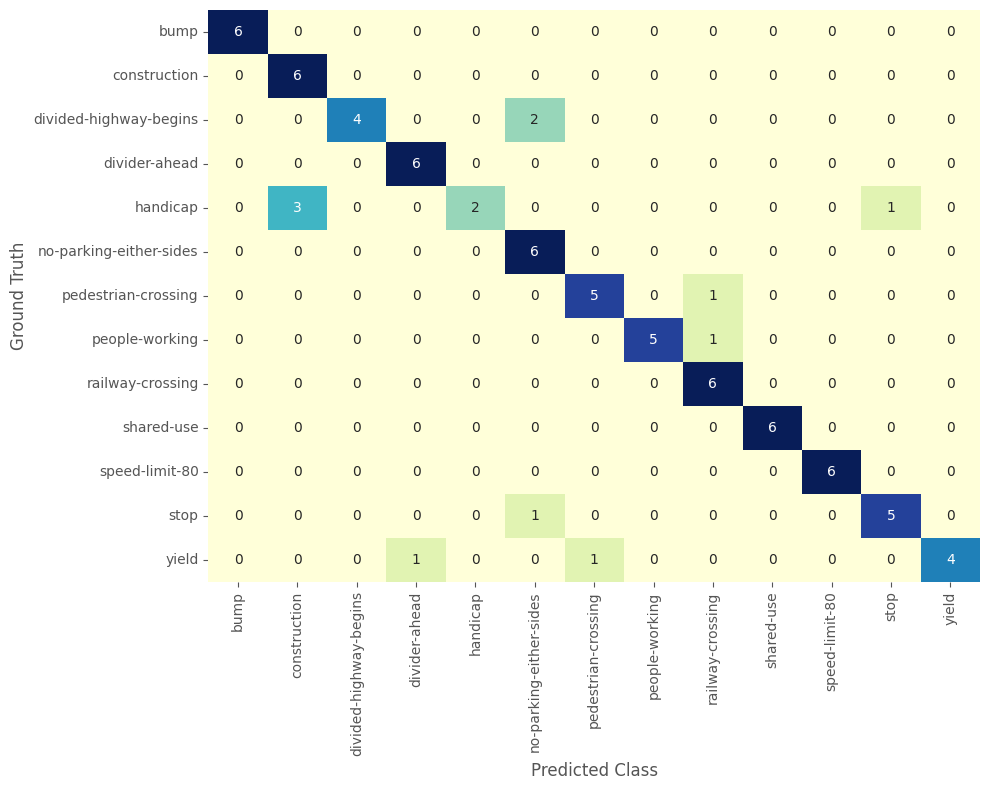

<Figure size 640x480 with 0 Axes>

In [22]:
# Confusion matrix of model predictions. This function only works for training new model.

confusion_matrix_results(y=y, y_pred=y_pred, classes=classes)

In [23]:
# Classification report. This function only works for training new model.

print(model_classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.67      1.00      0.80         6
           2       1.00      0.67      0.80         6
           3       0.86      1.00      0.92         6
           4       1.00      0.33      0.50         6
           5       0.67      1.00      0.80         6
           6       0.83      0.83      0.83         6
           7       1.00      0.83      0.91         6
           8       0.75      1.00      0.86         6
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         6
          11       0.83      0.83      0.83         6
          12       1.00      0.67      0.80         6

    accuracy                           0.86        78
   macro avg       0.89      0.86      0.85        78
weighted avg       0.89      0.86      0.85        78



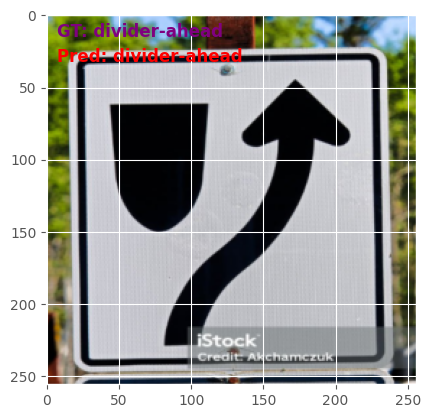

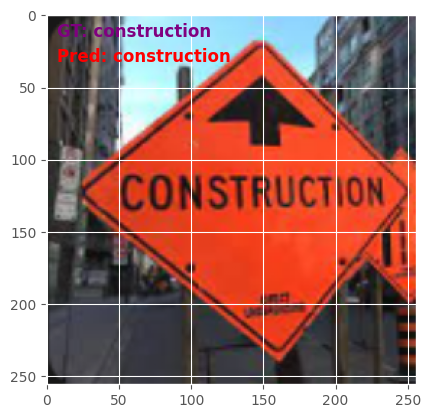

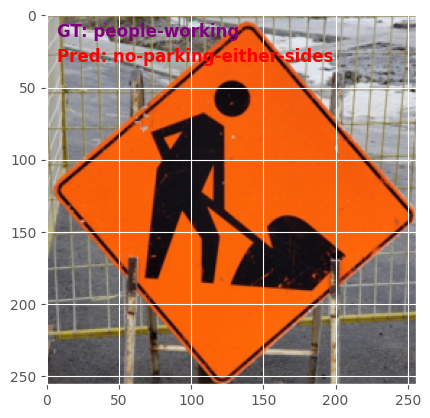

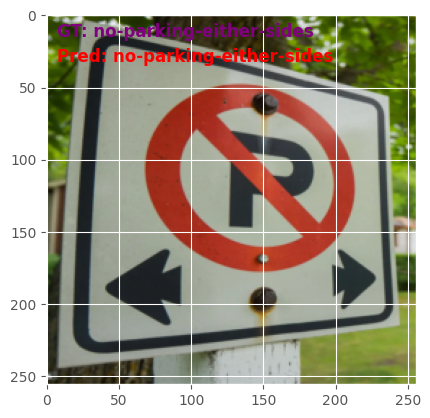

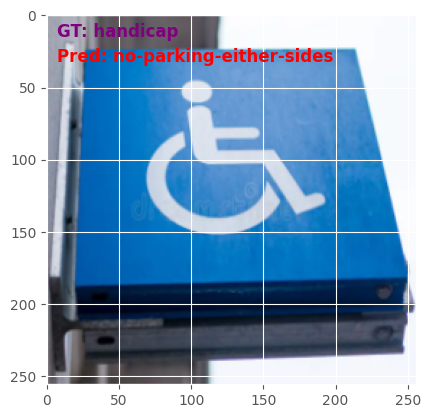

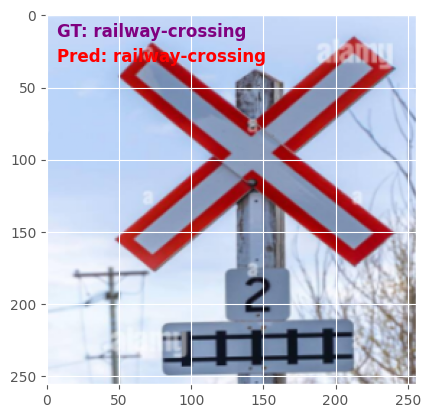

In [14]:
# Visualize some annotated predictions on the road signs dataset. This function works on both training new model and loading pretrained model.

# Get all the test image paths.
image_dir = '/home/sammie/Capstone Project/image-classification-of-road-signs/data/test_set'

annotated_predictions(image_dir=image_dir, model=model, classes=classes)